## Linear regression

In [19]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error

#### Declare some visual functions

In [20]:
def plot_actual_vs_predicted(X_validation, y_actual, y_pred, feature, xlabel, ylabel):
    """
    Draw a scatter plot comparing actual and predicted values for a specific feature.

    Parameters:
    X_validation (pd.DataFrame): Input data containing the feature to be plotted.
    y_actual (array-like): Actual value.
    y_pred (array-like): Predicted value.
    feature (str): Column name in X_validation to compare.
    xlabel (str): Label for the X-axis (name of the feature displayed on the chart).
    ylabel (str): Label for the Y-axis (e.g. Price, Area, ...).
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(X_validation[feature], y_actual, c='r', marker='o', label="Actual values", alpha=0.5) 
    plt.scatter(X_validation[feature], y_pred, c='b', marker='s', label="Predicted values", alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(f"Scatter Plot of Actual vs Predicted {ylabel} per {xlabel}")
    plt.show()


#### Select feature

##### Read data

- Practice training

In [21]:
df = pd.read_csv("TransformedData.csv")
df.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,Legal Status,House Direction,Price,Ward Name_Phường An Hải Bắc,...,Street Name_đường lê sao,Street Name_đường phước lý 2,Street Name_đường phước lý 4,Street Name_đường số 5,Street Name_Ấp Bắc,1 Part Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.399426,4.008825,10.000000,2.236068,0.111790,4,4,5.0,250000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
1,10.400602,4.003590,10.000000,2.236068,0.111790,4,5,6.0,270000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1
2,10.399521,4.008289,8.660254,2.236068,-1.269336,4,6,4.0,280000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
3,10.400602,3.996527,12.369317,2.236068,2.874041,1,1,5.0,415000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0
4,10.400601,3.996523,11.832160,2.236068,2.321591,1,1,6.0,450000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0


##### Input variables

- Practice training

In [22]:
x = df.drop(columns=["Price", "Legal Status"])
x.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,House Direction,Ward Name_Phường An Hải Bắc,Ward Name_Phường An Hải Tây,Ward Name_Phường An Hải Đông,...,Street Name_đường lê sao,Street Name_đường phước lý 2,Street Name_đường phước lý 4,Street Name_đường số 5,Street Name_Ấp Bắc,1 Part Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.399426,4.008825,10.000000,2.236068,0.111790,4,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
1,10.400602,4.003590,10.000000,2.236068,0.111790,4,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1
2,10.399521,4.008289,8.660254,2.236068,-1.269336,4,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
3,10.400602,3.996527,12.369317,2.236068,2.874041,1,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0
4,10.400601,3.996523,11.832160,2.236068,2.321591,1,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0


##### Target variables

- Practice training

In [23]:
y = df[['Price']]
y.head()

,Price
0,250000000
1,270000000
2,280000000
3,415000000
4,450000000


##### Divide into 2 training sets and validation sets

 - Split data

In [24]:
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=43)
print(X_train.shape, X_validation.shape)
print(y_train.shape, y_validation.shape)

(1820, 1153) (456, 1153)
(1820, 1) (456, 1)


#### Model training

##### Create a linear regression model object from the linear_model library and train it with input and target variables

In [25]:
regr = linear_model.LinearRegression(fit_intercept=True) 
regr.fit(X_train, y_train)

LinearRegression()

##### Correlation Coefficient and Intercept Deviation Value

In [26]:
print( 'Coefficient : ', regr.coef_ )
print( 'Interception  : ', regr.intercept_ )

Coefficient :  [[-1.47059856e+11  1.80361185e+11  6.81589579e+08 ... -9.16008960e+08
   1.61341440e+08  8.09697280e+07]]
Interception  :  [2.40792006e+19]


##### Real estate price prediction

- On the train set

In [27]:
y_pred_train = regr.predict(X_train)
y_pred_train

array([[1.44977510e+09],
       [4.40082432e+09],
       [1.52025088e+09],
       ...,
       [4.39994368e+09],
       [4.59977114e+09],
       [3.55007283e+09]])

- Prediction on validation set

In [28]:
y_pred_validation = regr.predict(X_validation)
y_pred_validation

array([[ 2.24719870e+20],
       [ 4.61871104e+09],
       [ 2.77687091e+09],
       [ 4.54559980e+20],
       [ 5.07139277e+09],
       [-1.38652296e+20],
       [ 4.39420886e+19],
       [ 1.21349734e+09],
       [ 3.55556147e+09],
       [ 4.20472013e+09],
       [ 1.97895081e+18],
       [ 3.10520627e+09],
       [ 4.34127258e+09],
       [ 3.00291686e+09],
       [ 3.81799629e+09],
       [ 3.03958016e+09],
       [ 4.00143565e+09],
       [ 5.49851546e+09],
       [ 1.18940480e+19],
       [ 4.64400732e+19],
       [ 1.18940480e+19],
       [ 3.74696755e+09],
       [ 1.18940480e+19],
       [ 7.51087616e+08],
       [ 4.86514278e+09],
       [ 4.08501862e+09],
       [ 4.19923149e+09],
       [ 4.54640845e+09],
       [ 3.66412186e+09],
       [ 1.18940480e+19],
       [-4.06303130e+19],
       [ 4.50311373e+09],
       [ 2.62151373e+09],
       [ 3.72026163e+09],
       [ 5.23859558e+09],
       [ 1.18940480e+19],
       [ 3.26260326e+09],
       [ 5.33088933e+20],
       [ 3.1

#### Model Evaluation

##### Calculation of mean square error MSE

- Train set

In [29]:
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 1.3613753330974765e+17


- Validation set

In [30]:
mse = mean_squared_error(y_validation, y_pred_validation)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 6.196581712516143e+39


##### R-squared tells us how much of the target variable the input variables can explain. The larger the R-squared, the better the model. When R-squared is 95%, it means that the input variables have explained 95% of the variation in the target variable.

- Train set

In [31]:
R_squared = r2_score(y_train, y_pred_train)
print("R² Score:", R_squared)

R² Score: 0.9405190855486961


- Validation set

In [32]:
R_squared = r2_score(y_validation, y_pred_validation)
print("R² Score:", R_squared)

R² Score: -3.1743487848358394e+21


##### 4.3 MAPE is an index that measures the percentage error between the forecast value and the actual value (mean absolute percentage error) <br> When a model has MAPE = 5%, we say that the model has an average error of 5% compared to the average value

- Train set

In [33]:
mape = mean_absolute_percentage_error(y_train, y_pred_train)
print("MAPE:", mape)

MAPE: 0.07482039685355306


- Validation set

In [34]:
mape = mean_absolute_percentage_error(y_validation, y_pred_validation)
print("MAPE:", mape)

MAPE: 9103329263.895487


##### Visualization of the *Price* characteristic difference between the initial value and the predicted value

- Training set

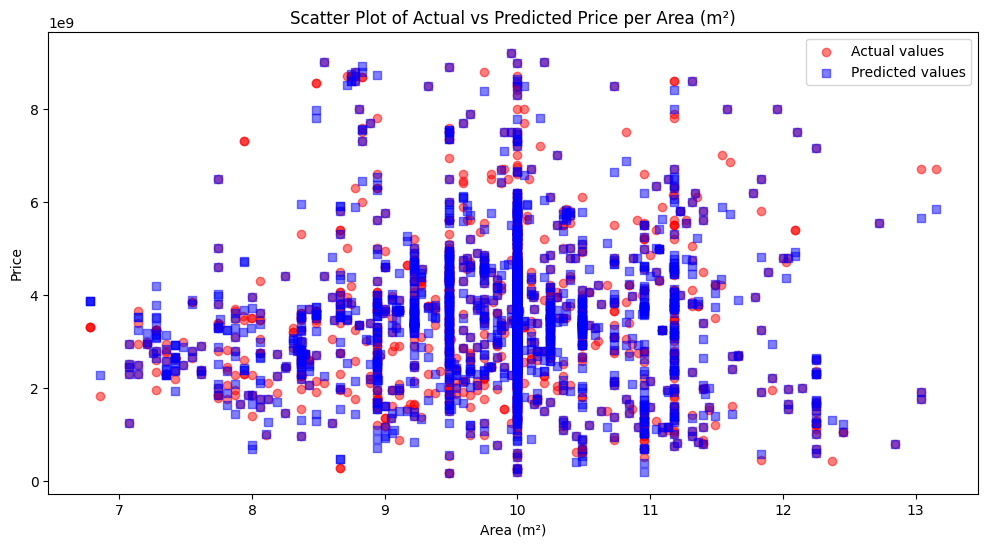

In [35]:
plot_actual_vs_predicted(X_train, y_train, y_pred_train, "Area (m²)", "Area (m²)", "Price")

- Validation set 

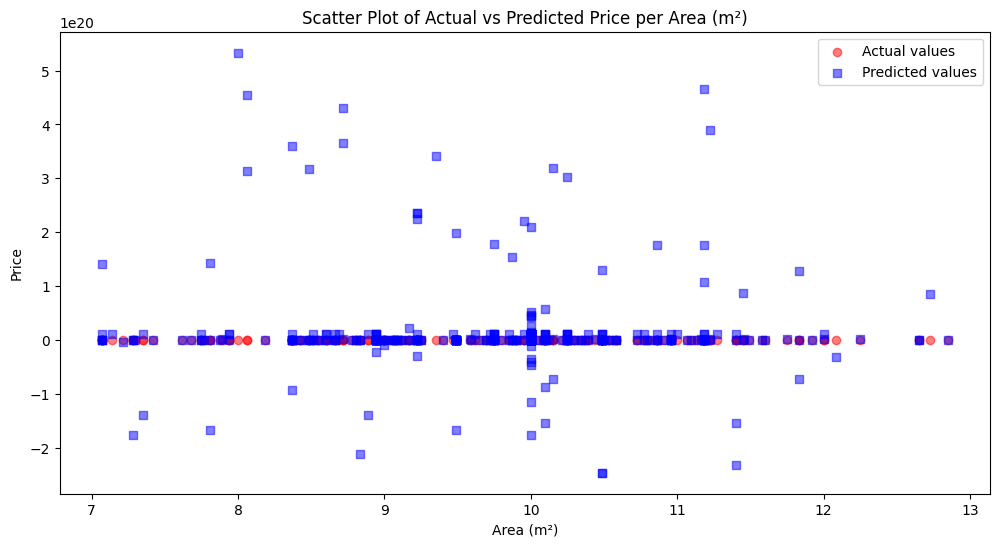

In [36]:
plot_actual_vs_predicted(X_validation, y_validation, y_pred_validation, "Area (m²)", "Area (m²)", "Price")

#### Conclusion

- Linear Regression is a supervised learning algorithm, used to estimate the relationship between independent variables and dependent variables. It is a statistical method used to find the best linear function to represent this relationship.
- Based on the assumption that the correlation between variables is linear, this algorithm predicts the value of the target variable from the values ​​of the input variables.
- This method is considered Simple Regression, prone to Overfitting with large data sets
- This method is also unstable, when the value of random_state changes, it can lead to fluctuations in the performance of the model.